### <mark> pyspark.sql.Column class 

provides several functions to work with DataFrame to manipulate the Column values, evaluate the boolean expression to filter rows, retrieve a value or part of a value from a DataFrame column, and to work with list, map & struct columns.

    PySpark Column class represents a single Column in a DataFrame.
    It provides functions that are most used to manipulate DataFrame Columns & Rows.
    Some of these Column functions evaluate a Boolean expression that can be used with filter() transformation to filter the DataFrame Rows.
    Provides functions to get a value from a list column by index, map value by key & index, and finally struct nested column.
    PySpark also provides additional functions pyspark.sql.functions that take Column object and return a Column type.
    
Most of the pyspark.sql.functions return Column type hence it is very important to know the operation you can perform with Column type.

#### <mark> Create a Column class object is by using PySpark lit() SQL function, 
this takes a literal value and returns a Column object.

> from pyspark.sql.functions import lit

> colObj = lit("sparkbyexamples.com")

#### <mark> Access the Column from DataFrame by multiple ways.

    # root
    # |-- name.fname: string (nullable = true)
    # |-- gender: long (nullable = true)
    # |-- prop: struct (nullable = true)
    # |      |-- hair: string (nullable = true)
    # |      |-- eye: string (nullable = true)

    df.select(col("gender")).show()
    df.select(df.gender).show()
    df.select(df["gender"]).show()
    
    # use backticks, if column name has a dot in it
    df.select(df["`name.fname`"]).show() 
    
    # Access struct column
    df.select(df["prop.hair"]).show()
    
    # #Access all columns from struct
    df.select(col("prop.*")).show()
    df.select(*).show()

#### <mark> Column Operators

    df.select(df.col1 + df.col2).show()
    df.select(df.col1 - df.col2).show() 
    df.select(df.col1 * df.col2).show()
    df.select(df.col1 / df.col2).show()
    df.select(df.col1 % df.col2).show()

    df.select(df.col2 > df.col3).show()
    df.select(df.col2 < df.col3).show()
    df.select(df.col2 == df.col3).show()

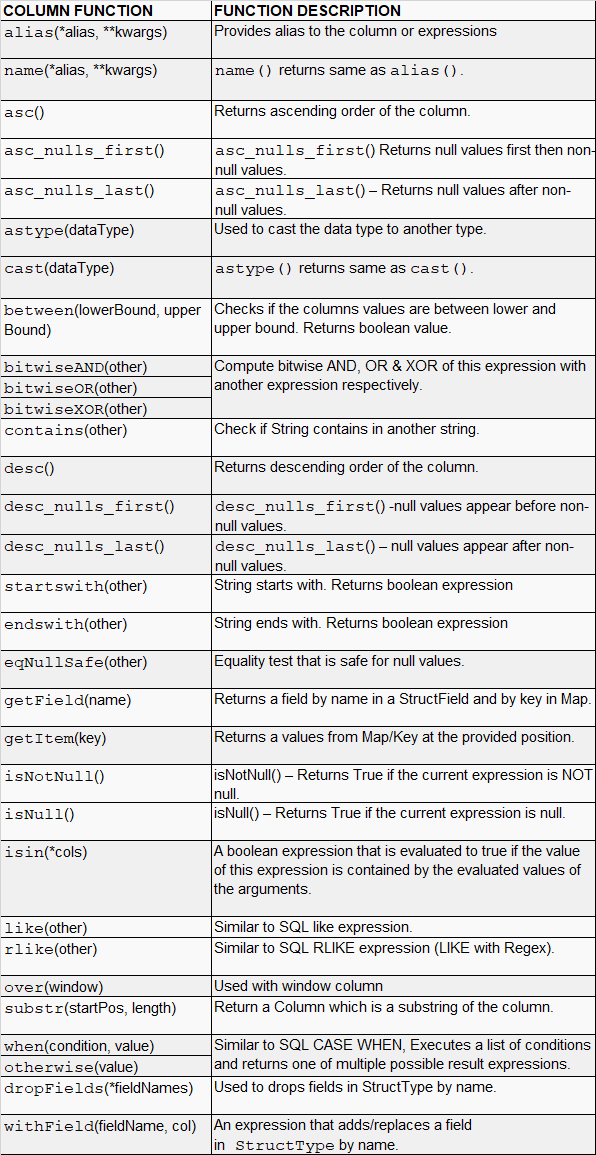

    # rename column using alias
    df.select(df.fname.alias("first_name"), \
              df.lname.alias("last_name")
       )
   

    # to concatenate columns and named column as fullName
    from pyspark.sql.functions import expr
    df.select(expr(" fname ||','|| lname").alias("fullName") \
       )
       
       
    df.sort(df.fname.asc())
    df.sort(df.fname.desc())


    df.select(
        df.fname,
        df.id.cast("int")
        )

    # between() – Returns a Boolean expression when a column values in between lower and upper bound.
    df.filter(df.id.between(100,300))
    
    
    # contains() – Checks if a DataFrame column value contains a a value specified in this function.
    df.filter(df.fname.contains("Cruise"))
    
    
    # isin() – Check if value presents in a List.
    df.filter(df.id.isin(id_list))
    
    
    df.filter(df.fname.startswith("T"))
    df.filter(df.fname.endswith("Cruise"))
    
    
    df.filter(df.lname.isNull())
    df.filter(df.lname.isNotNull())
    
    
    df.filter(df.fname.like("%om")) 

    # When, executes sequence of expressions until it matches the condition and returns a value when match.
    # when & otherwise
    from pyspark.sql.functions import when
    df.select(df.fname,df.lname,when(df.gender=="M","Male") \
                  .when(df.gender=="F","Female") \
                  .when(df.gender==None ,"") \
                  .otherwise(df.gender).alias("new_gender") \
        )

getField() – To get the value by key from MapType column and by stuct child name from StructType column

    # getField from MapType
    df.select(df.properties.getField("hair"))
    # getField from Struct
    df.select(df.name.getField("fname"))


getItem() – To get the value by index from MapType or ArrayTupe & ny key for MapType column.

    #getItem() used with ArrayType
    df.select(df.languages.getItem(1)).show()

    #getItem() used with MapType
    df.select(df.properties.getItem("hair")).show()

# dropfield

# over

# withField